<a href="https://colab.research.google.com/github/azizdafi/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Sayed_Aziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Sayyed Aziz Ahmed


# **Project Summary -**

to be writen answer here

# **GitHub Link -**

[Github](https://github.com/azizdafi/Netflix-Movies-and-TV-Shows-Clustering)

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [83]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
#setting font size throughout the notebook
plt.rcParams.update({'font.size': 14})
# plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [2]:
# Load Dataset
# Load Dataset
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


# reading data file 
dir_path = '/content/drive/MyDrive/Colab Notebooks/cap stone/Netflix/'
file_name = 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
data_file_path = dir_path + file_name
df = pd.read_csv(data_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
x = df.shape
print(f'the dataset has {x[0]} rows and {x[1]} columns')

the dataset has 7787 rows and 12 columns


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)
print('-'*30)
print('Missing values in percentage')
print('-'*30)
missing_percentages = (df.isna().mean() * 100).round(2)
print(missing_percentages)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
------------------------------
Missing values in percentage
------------------------------
show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64


Text(0.5, 1.0, 'Visualizing the missing values')

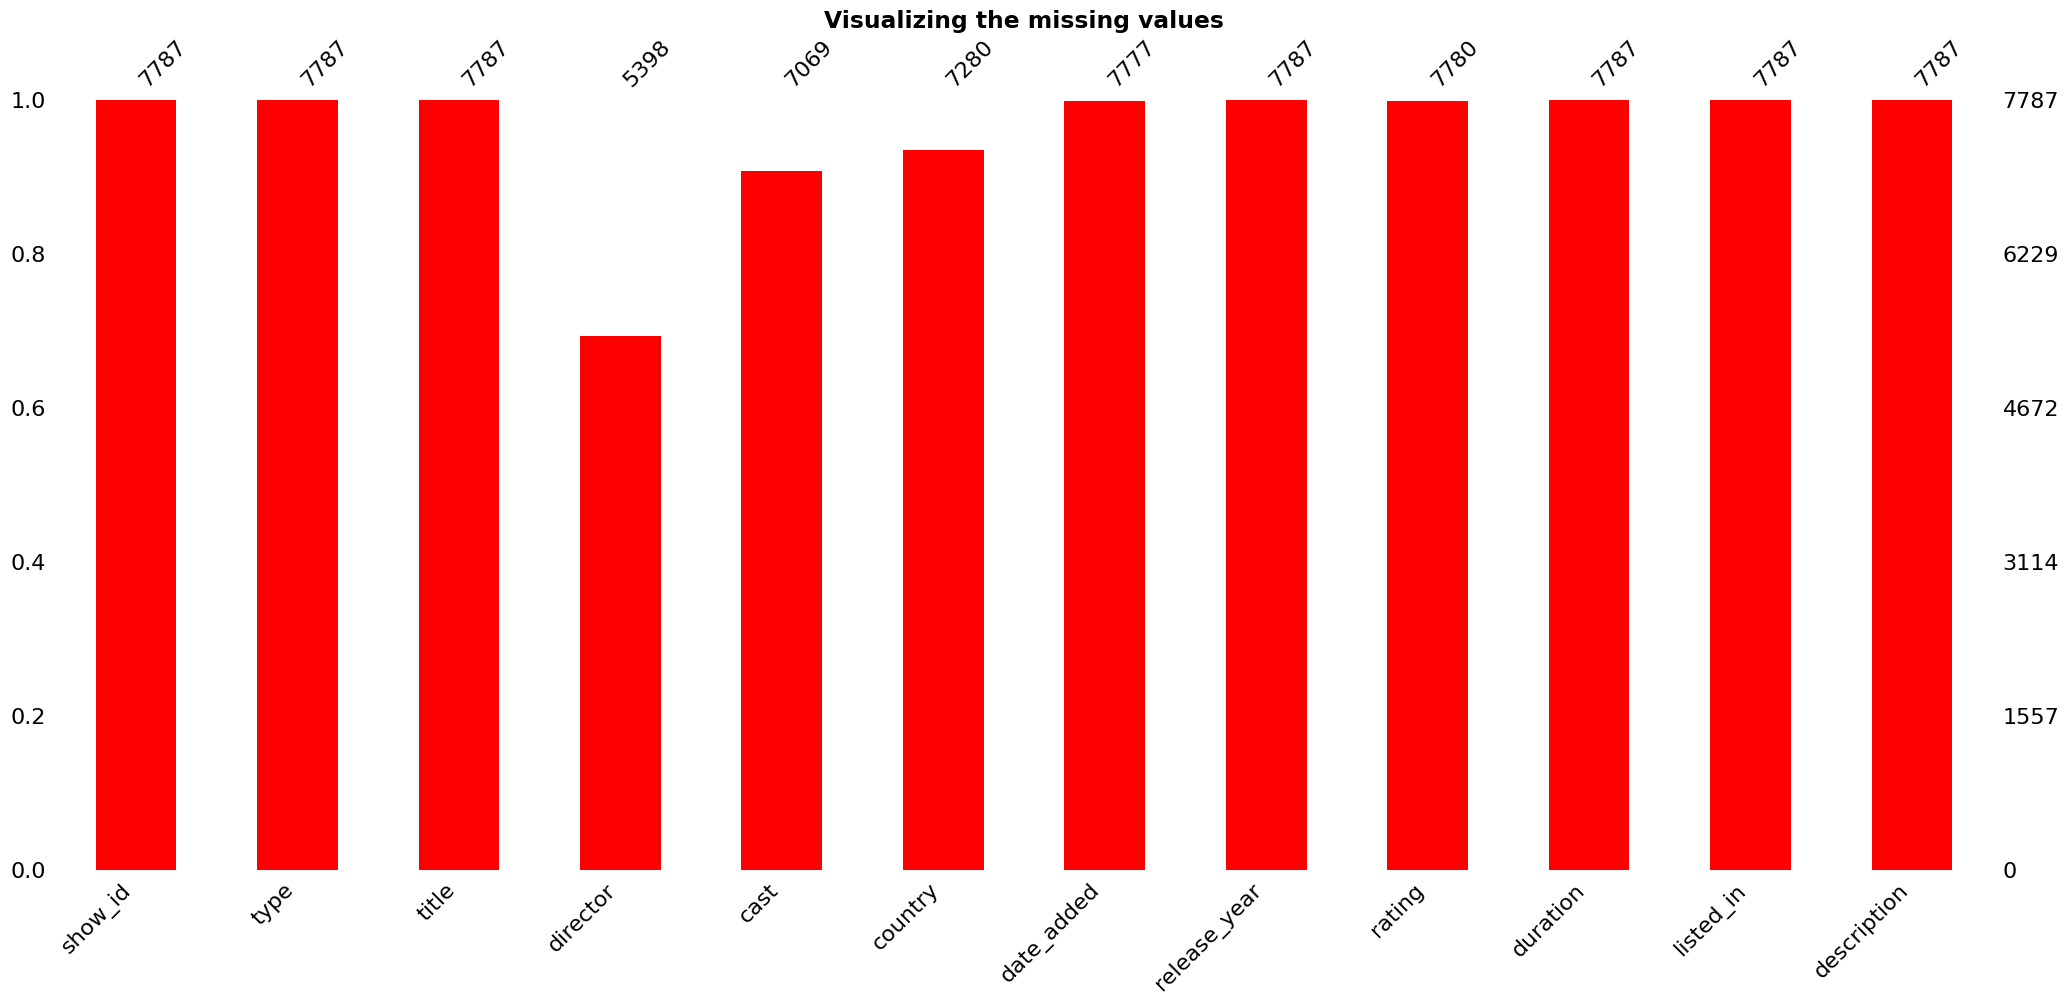

In [9]:
# Visualizing the missing values
my_palette = sns.color_palette('Reds', 1)
msno.bar(df,color = 'Red')
# msno.heatmap(df, cmap=my_palette)
plt.title('Visualizing the missing values')

### What did you know about your dataset?

**show_id**: Unique Id number for all the listed rows

**type**: denotes type of show namely TV Show or Movie

**title**: title of the movie

**director**: Name of director/directors

**cast**: lists the cast of the movie

**country**: country of the production house

**date_added**: the date the show was added

**release_year**: year of the release of the show

**rating**: show ratings

**duration**: duration of the show

**listed_in**: the genre of the show

**description**: summary/ description of the movie


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
col = df.columns
print(col)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [11]:
# Dataset Describe
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**show_id**: Unique Id number for all the listed rows

**type**: denotes type of show namely TV Show or Movie

**title**: title of the movie

**director**: Name of director/directors

**cast**: lists the cast of the movie

**country**: country of the production house

**date_added**: the date the show was added

**release_year**: year of the release of the show

**rating**: show ratings

**duration**: duration of the show

**listed_in**: the genre of the show

**description**: summary/ description of the movie


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable and listing values whose count is less than 25
for column in df.columns:
  res = len(df[column].unique())
  print(f'The number of unique variables in {column} column are: {res}')
  if res<=15:
    x = df[column].unique()
    print(f'printing unique values of {column}')
    print('the values are: ', x )
    print('--'*30)


The number of unique variables in show_id column are: 7787
The number of unique variables in type column are: 2
printing unique values of type
the values are:  ['TV Show' 'Movie']
------------------------------------------------------------
The number of unique variables in title column are: 7787
The number of unique variables in director column are: 4050
The number of unique variables in cast column are: 6832
The number of unique variables in country column are: 682
The number of unique variables in date_added column are: 1566
The number of unique variables in release_year column are: 73
The number of unique variables in rating column are: 15
printing unique values of rating
the values are:  ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']
------------------------------------------------------------
The number of unique variables in duration column are: 216
The number of unique variables in listed_in column are: 492
The number of u

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

# filling cast value as not available
df['cast'] = df['cast'].fillna(value='Not available')

# filling contry null values as not known, the same can be replaced by mode of the country using the below commented code
# Note: only one line should be selected to run this
df['country'] = df['country'].fillna(value='Not Known')
# df['country'] = df['country'].fillna(value=df['country'].mode())

# since date_added and rating have low % share that is 0.13 and 0.09 we are dropping the same
df = df.dropna(subset=['date_added','rating'])
# since too many missing values in director column, we are dropping the same
df = df.drop(['director'],axis=1)

In [15]:
# checking missing value again for confirmation
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

To make the data analysis ready we have done the following:
1. filled missing values of cast with Not available
2. filled missing values of cast with Not Known
3. dropped rows of date_added missing values
4. dropped rows of ratings missing values
5. dropped the entire column of director as it had 30% of the data

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
pie plot

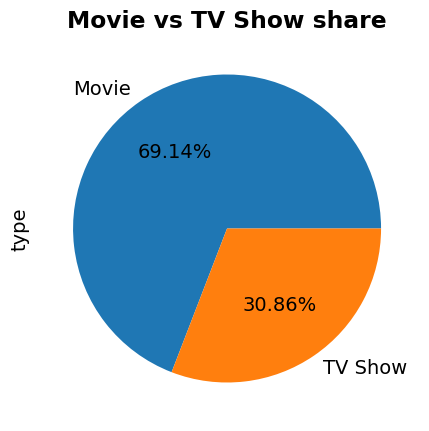

In [16]:
# Chart - 1 visualization code
spread = df['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# pictdistance 0.6 is set to display the value inside the chart, if set more than 1, it'll display outside the chart.
spread.plot(kind = 'pie', autopct='%1.2f%%', pctdistance=0.6)

#setting colum chart title
plt.title(f'Movie vs TV Show share')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are easy to interpret and understand the logic and share of values better in percentage.

##### 2. What is/are the insight(s) found from the chart?

69.05% of the data is of movies while 30.95% of the data belongs to TV Shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

the insights show us that most of the data is of movies

#### Chart - 2
count plot for various ratings

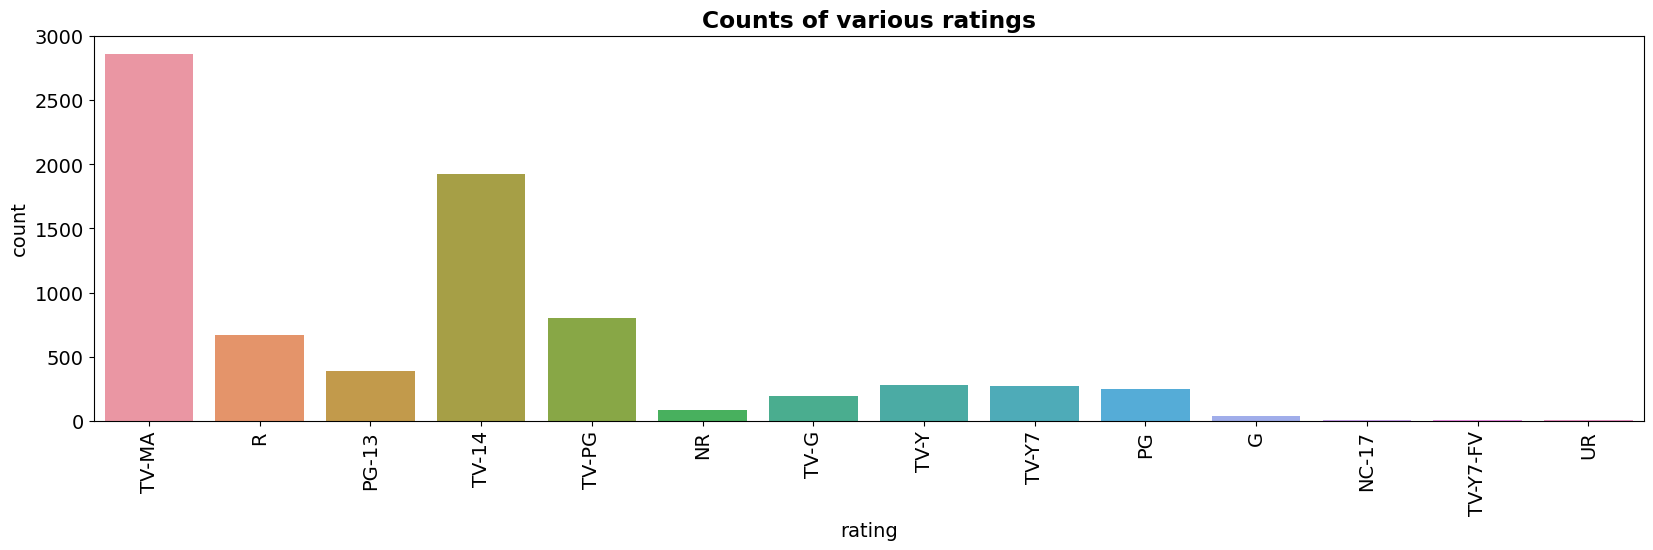

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


In [17]:
# Chart - 2 visualization code 
plt.figure(figsize=(20, 5))
sns.countplot(x='rating', data=df)

# setting chart title
plt.title('Counts of various ratings')
plt.xticks(rotation = 90)

# display chart
plt.show()

# printing the counts for reference
print(df.rating.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

It is found that most of the ratings are given by TV-MA(2863) followed by TV-14(1931) the least ratings are by NC-17(3)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Gained insites are good to understand the ratings system on the dataframe

#### Chart - 3
Top 10 countries with maximum movies

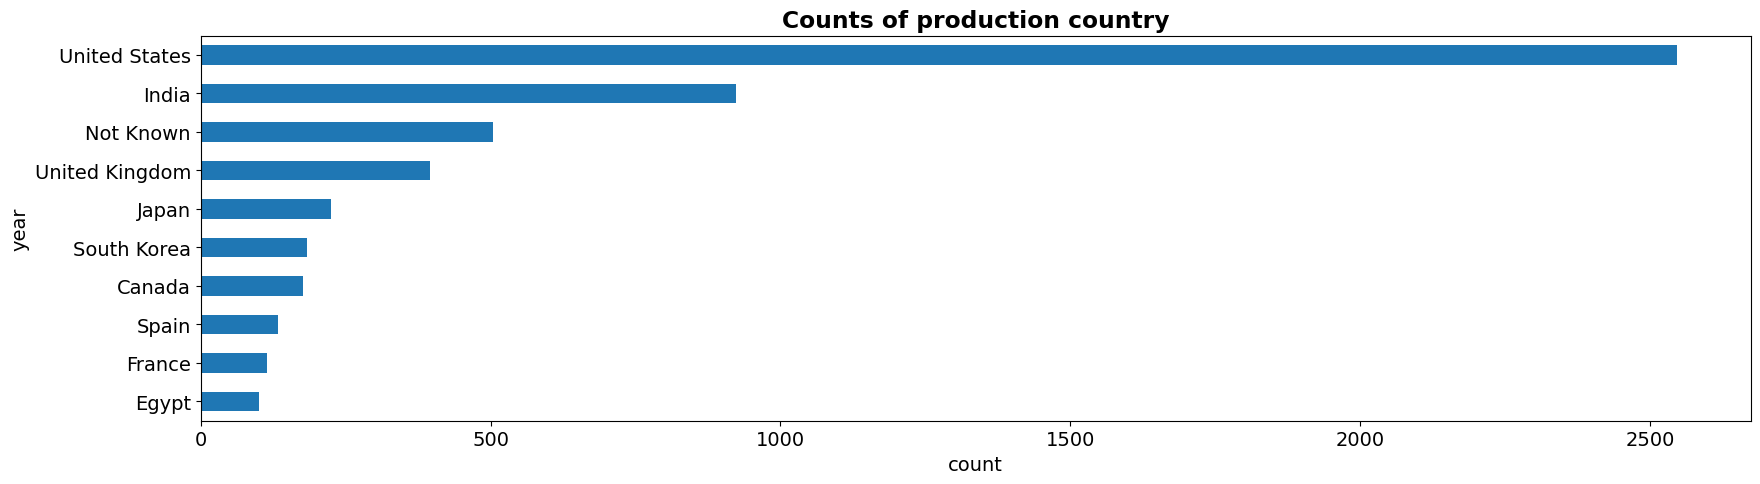

United States     2546
India              923
Not Known          505
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64


In [18]:
# Chart - 3 visualization code

plt.figure(figsize=(20, 5))
df['country'].value_counts().head(10).sort_values(ascending = True).plot(kind='barh')
# sns.countplot(x='country', data=df)

# setting chart title
plt.title('Counts of production country')
# plt.xticks(rotation = 90)
plt.ylabel('year')
plt.xlabel('count')
# display chart
plt.show()

# printing the counts for reference
print(df.country.value_counts().head(10))

##### 1. Why did you pick the specific chart?

Horizontal bar is good to visualize the data and interpret the data

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4
Counts of movies with respect to various years

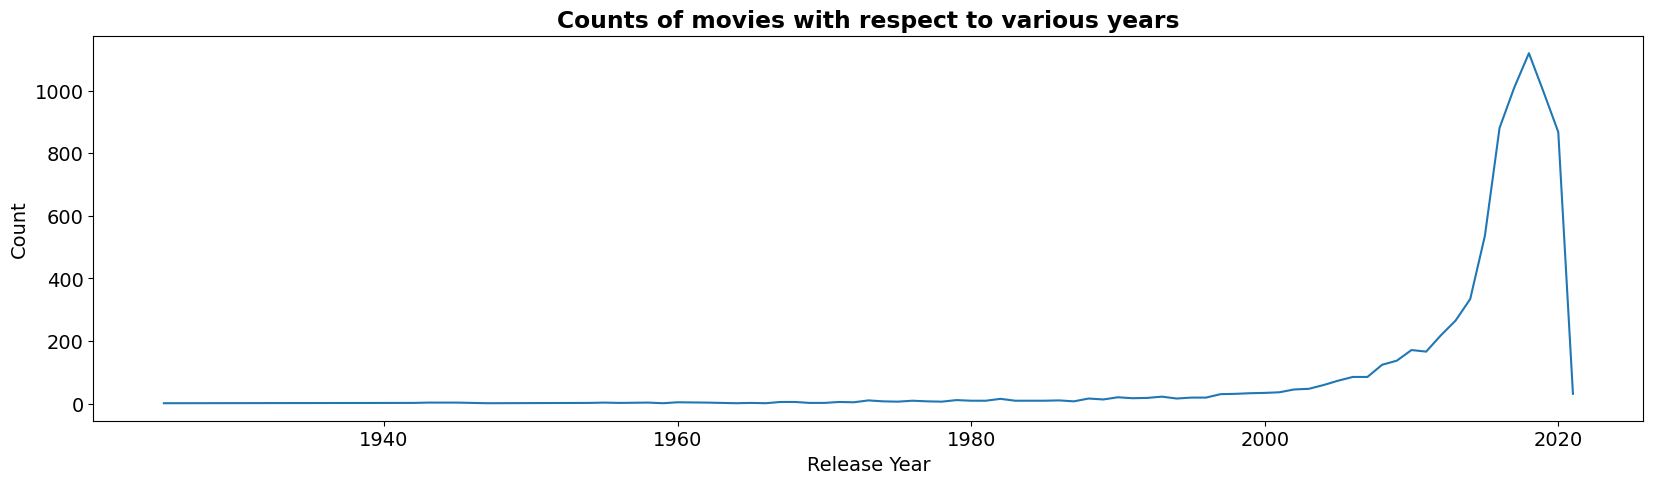

In [19]:
# Chart - 4 visualization code
# creating temp dataframe
temp_data_df = df.groupby(['release_year'])['show_id'].count()
plt.rcParams['figure.figsize'] = (20, 5)

# plotting the temp df
temp_data_df.plot.line()
# setting chart title
plt.title('Counts of movies with respect to various years')
plt.ylabel('Count')
plt.xlabel('Release Year')
# display chart
plt.show()

# deleting the temporary dataframe for optimization of memory
del temp_data_df

##### 1. Why did you pick the specific chart?

A line chart is better to understand the treands with respect to time

##### 2. What is/are the insight(s) found from the chart?

It is observed that most of the movies on netflix are of the reliese date from 2010 to 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This helps us to understand that most of the movies released are new or old, its found that most are from recently released.

#### Chart - 5
Counts of movies with respect to various type of ratings

In [20]:
# seperating and creating 2 dataframe based on type
tv_shows_df = df[df['type']=='TV Show']
movies_df = df[df['type']=='Movie']

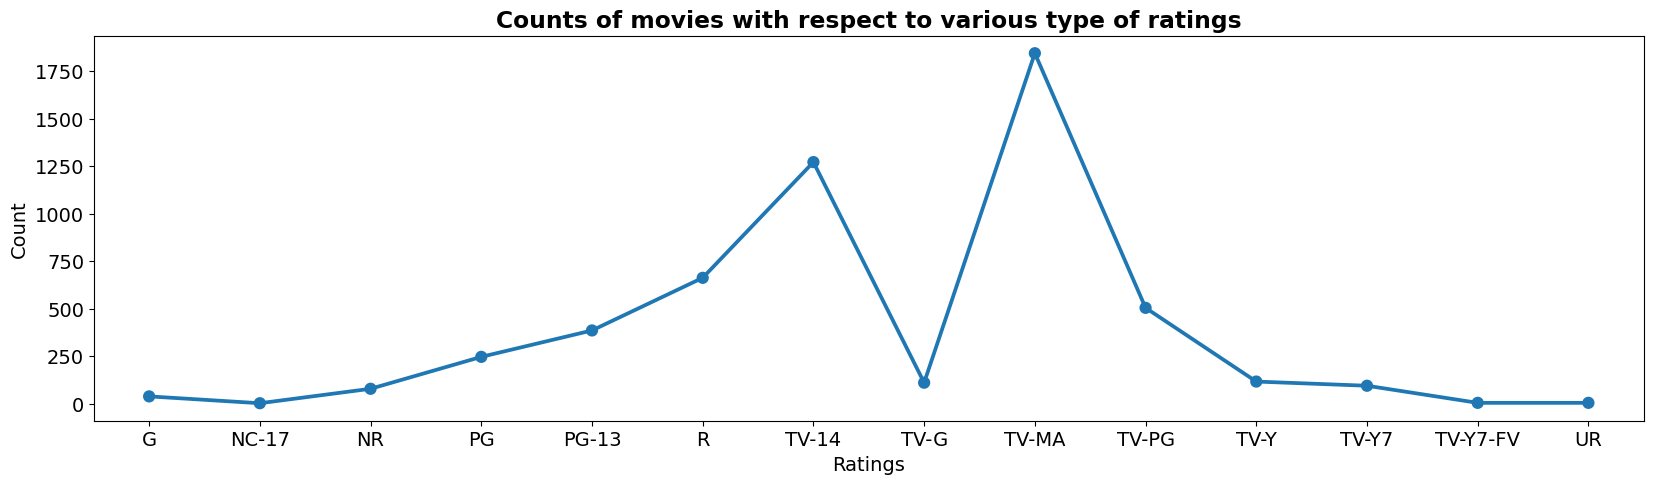

In [21]:
# Chart - 5 visualization code

movie_ratings = movies_df.groupby(['rating'])['show_id'].count().reset_index(name='count')
# top10_movies = movies_df['listed_in'].value_counts().reset_index(name='count').head(10)
# print(top10_movies)
sns.pointplot(x='rating',y='count',data=movie_ratings)

# setting chart title
plt.title('Counts of movies with respect to various type of ratings')
plt.ylabel('Count')
plt.xlabel('Ratings')
# display chart
plt.show()

# deleting the movie_ratings dataframe for optimization of memory
del movie_ratings

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6
Counts of TV Shows with respect to various type of ratings

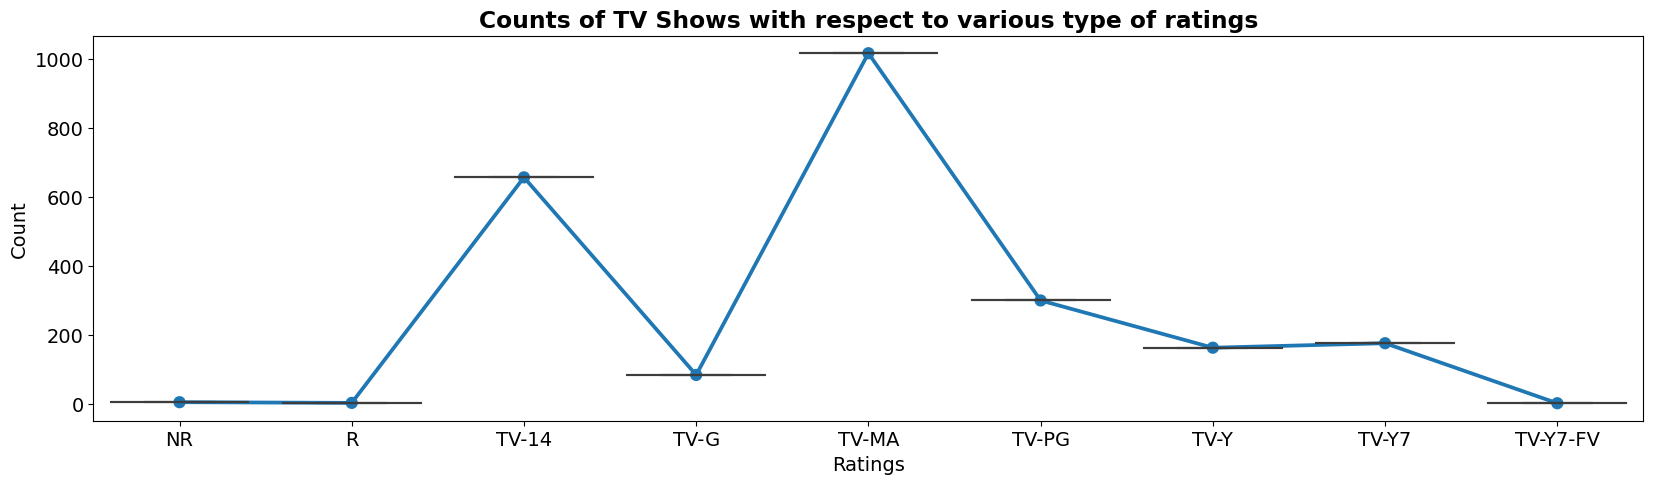

In [22]:
# Chart - 6 visualization code

# seperating and creating 2 dataframe based on type
tv_shows_df = df[df['type']=='TV Show']
movies_df = df[df['type']=='Movie']
tv_shows_ratings = tv_shows_df.groupby(['rating'])['show_id'].count().reset_index(name='count')

sns.pointplot(x='rating',y='count',data=tv_shows_ratings)
sns.boxplot(x='rating',y='count',data=tv_shows_ratings)

# setting chart title
plt.title('Counts of TV Shows with respect to various type of ratings')
plt.ylabel('Count')
plt.xlabel('Ratings')
# display chart
plt.show()

# deleting the movie_ratings dataframe for optimization of memory
del tv_shows_ratings

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7
Top 10 Movies Genre

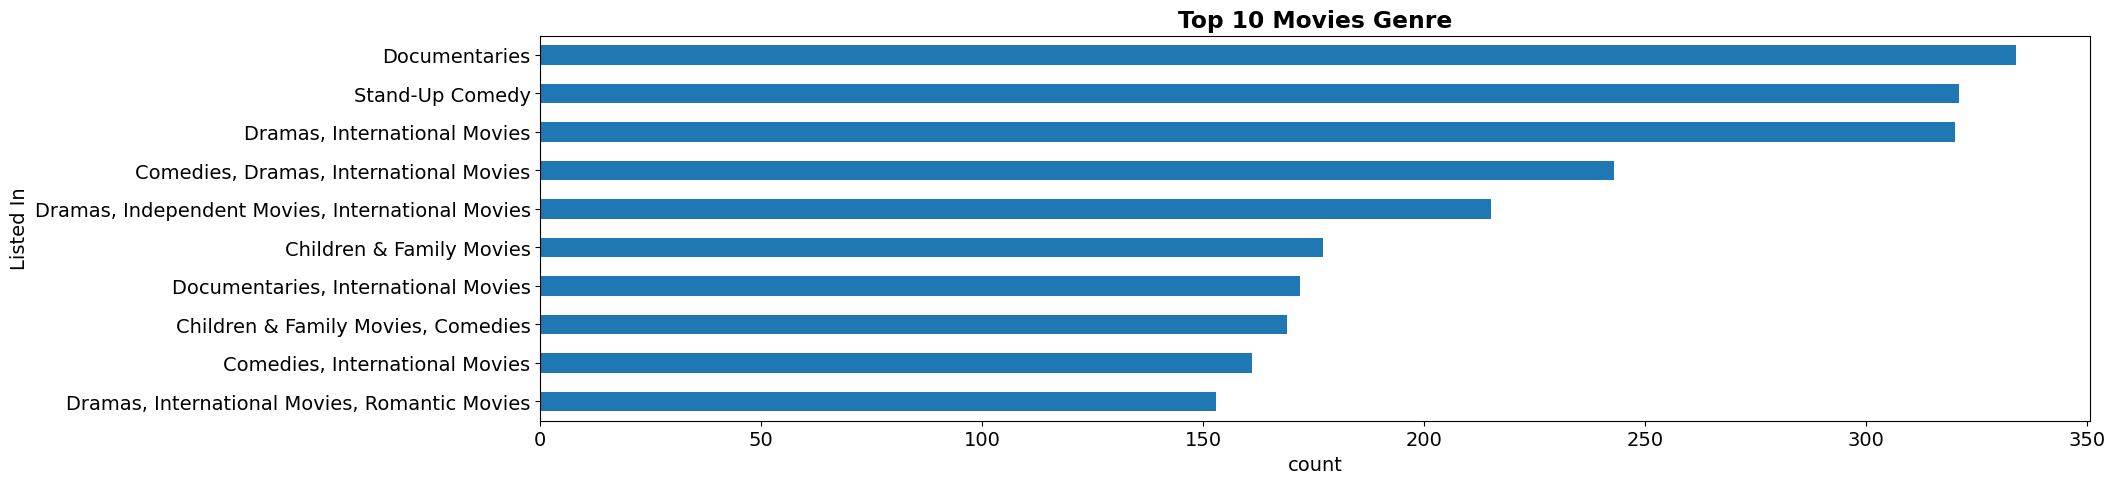

Dramas, International Movies, Romantic Movies       153
Comedies, International Movies                      161
Children & Family Movies, Comedies                  169
Documentaries, International Movies                 172
Children & Family Movies                            177
Dramas, Independent Movies, International Movies    215
Comedies, Dramas, International Movies              243
Dramas, International Movies                        320
Stand-Up Comedy                                     321
Documentaries                                       334
Name: listed_in, dtype: int64


In [23]:
# Chart - 7 visualization code
# getting counts of different movies in listed in
top10_movies = movies_df['listed_in'].value_counts()
# sorting based on counts
top10_movies = top10_movies.sort_values(ascending=True)
# getting to 10 of the dataframe from bottom
top10_movies = top10_movies.tail(10)

# plotting
top10_movies.plot(kind='barh')
# setting chart title
plt.title('Top 10 Movies Genre')
plt.ylabel('Listed In')
plt.xlabel('count')
# display chart
plt.show()

print(top10_movies)
# deleting the movie_ratings dataframe for optimization of memory
del top10_movies


##### 1. Why did you pick the specific chart?

barh is good to visualize the given scenario

##### 2. What is/are the insight(s) found from the chart?

It is found that there are 334 documentaries and 321 Standup comedy

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8
Top 10 TV Shows Genre

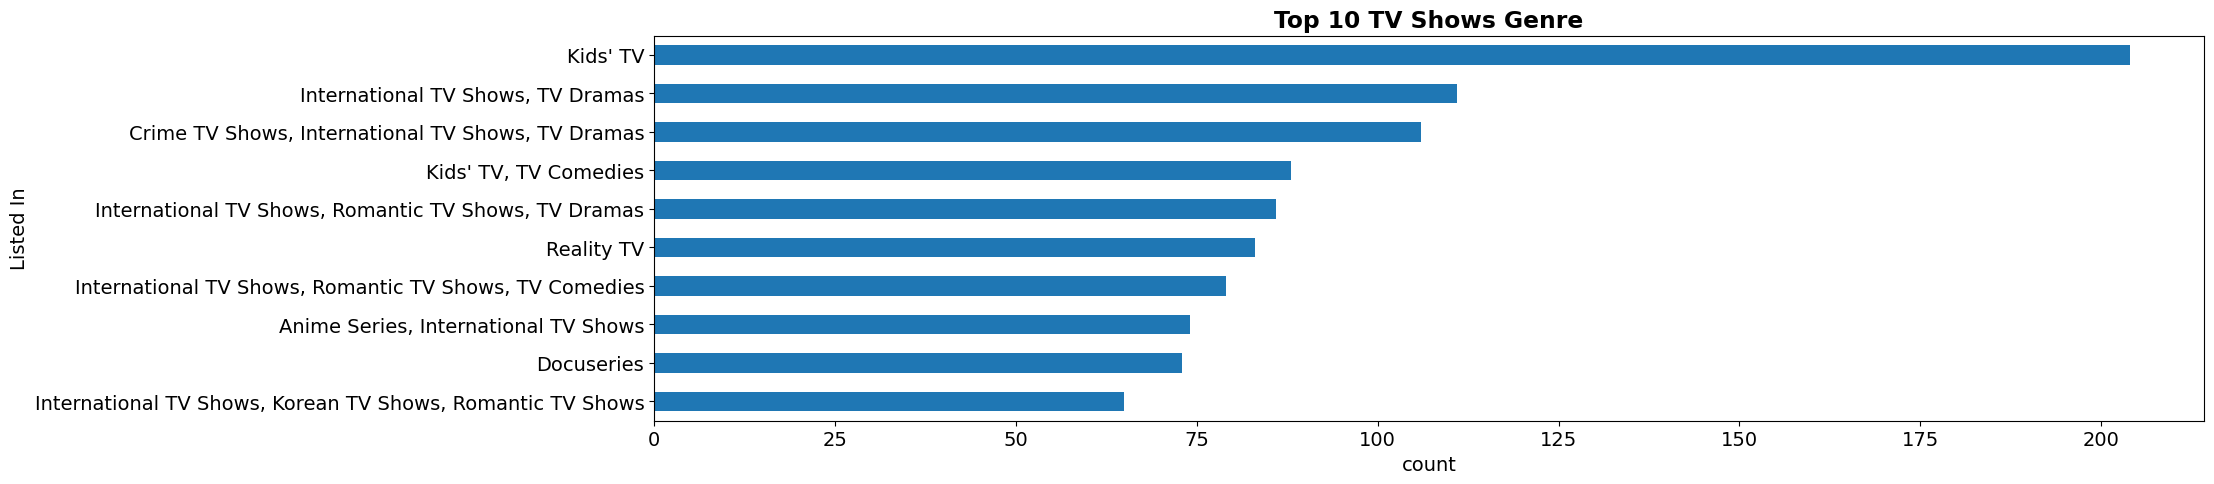

International TV Shows, Korean TV Shows, Romantic TV Shows     65
Docuseries                                                     73
Anime Series, International TV Shows                           74
International TV Shows, Romantic TV Shows, TV Comedies         79
Reality TV                                                     83
International TV Shows, Romantic TV Shows, TV Dramas           86
Kids' TV, TV Comedies                                          88
Crime TV Shows, International TV Shows, TV Dramas             106
International TV Shows, TV Dramas                             111
Kids' TV                                                      204
Name: listed_in, dtype: int64


In [24]:
# Chart - 8 visualization code

# getting counts of different TV shows in listed in
top10_TV_Shows = tv_shows_df['listed_in'].value_counts()
# sorting based on counts
top10_TV_Shows = top10_TV_Shows.sort_values(ascending=True)
# getting to 10 of the dataframe from bottom
top10_TV_Shows = top10_TV_Shows.tail(10)

# plotting
top10_TV_Shows.plot(kind='barh')
# setting chart title
plt.title('Top 10 TV Shows Genre')
plt.ylabel('Listed In')
plt.xlabel('count')
# display chart
plt.show()

print(top10_TV_Shows)
# deleting the movie_ratings dataframe for optimization of memory
del top10_TV_Shows


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

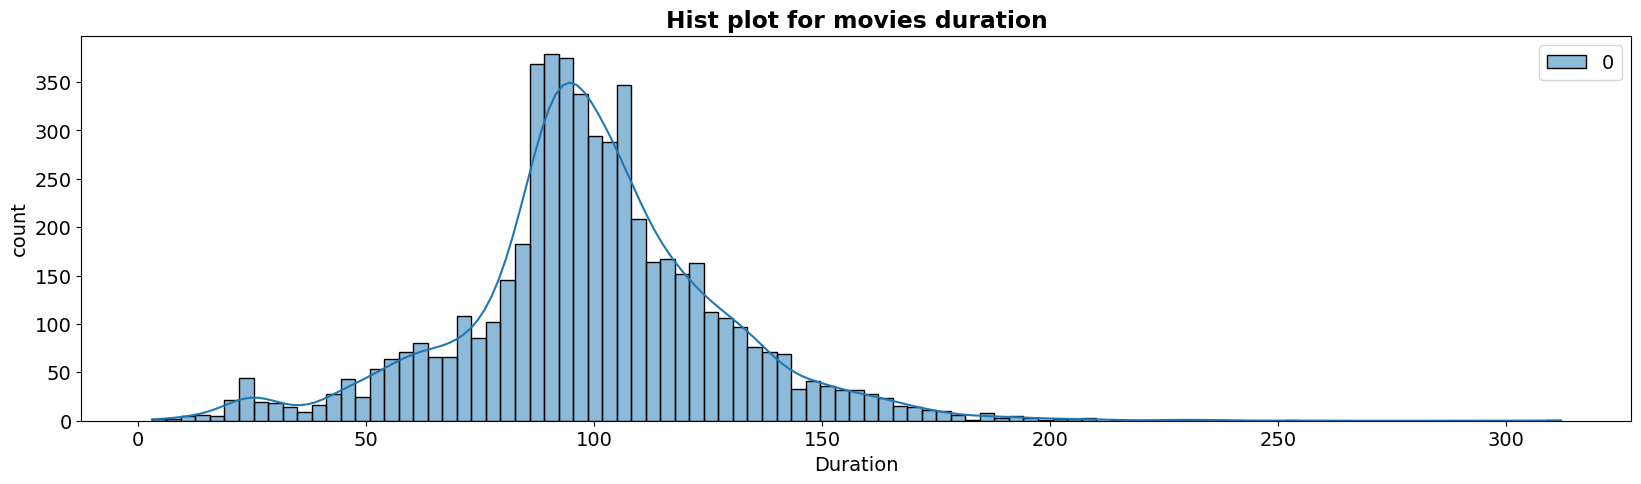

In [25]:
# Chart - 9 visualization code

sns.histplot(movies_df['duration'].str.extract('(\d+)').astype(int), kde=True, color='red')
# setting chart title
plt.title('Hist plot for movies duration')
plt.ylabel('count')
plt.xlabel('Duration')
# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

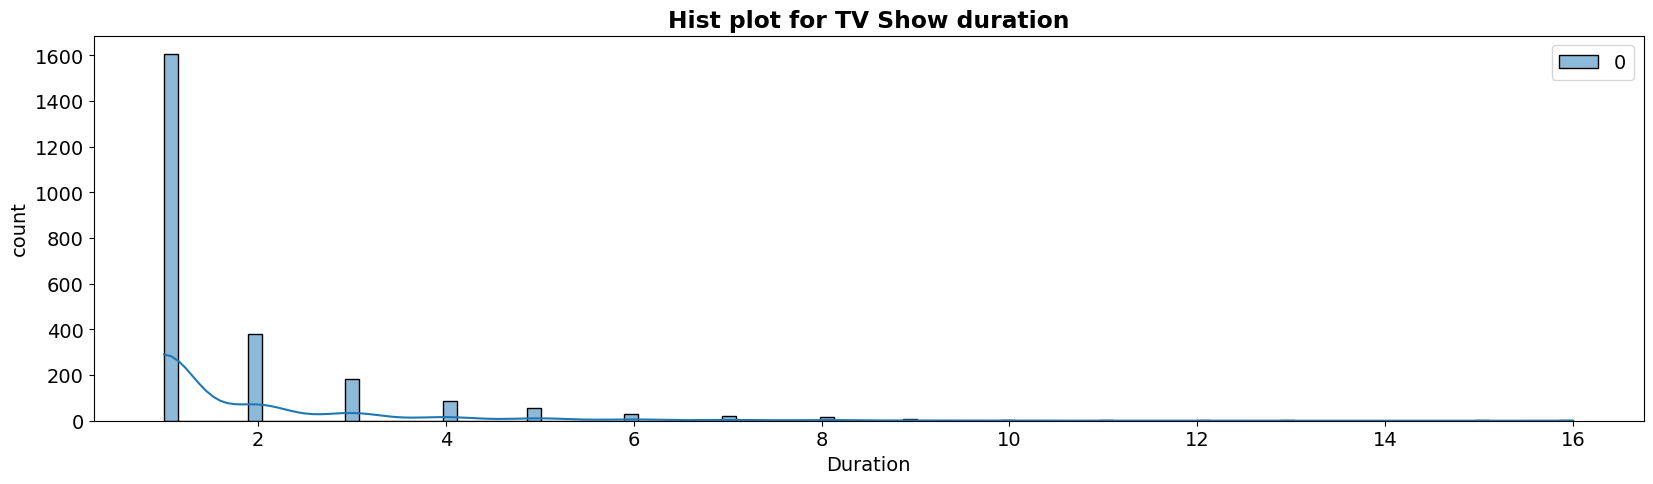

In [26]:
# Chart - 10 visualization code
sns.histplot(tv_shows_df['duration'].str.extract('(\d+)').astype(int), kde=True, color='red')
# setting chart title
plt.title('Hist plot for TV Show duration')
plt.ylabel('count')
plt.xlabel('Duration')
# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [27]:
for column in df.columns:
  res = len(df[column].unique())
  print(f"The number of unique variables in {column} column are: {res}")
df.head()


The number of unique variables in show_id column are: 7770
The number of unique variables in type column are: 2
The number of unique variables in title column are: 7770
The number of unique variables in cast column are: 6818
The number of unique variables in country column are: 682
The number of unique variables in date_added column are: 1563
The number of unique variables in release_year column are: 73
The number of unique variables in rating column are: 14
The number of unique variables in duration column are: 216
The number of unique variables in listed_in column are: 491
The number of unique variables in description column are: 7752


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


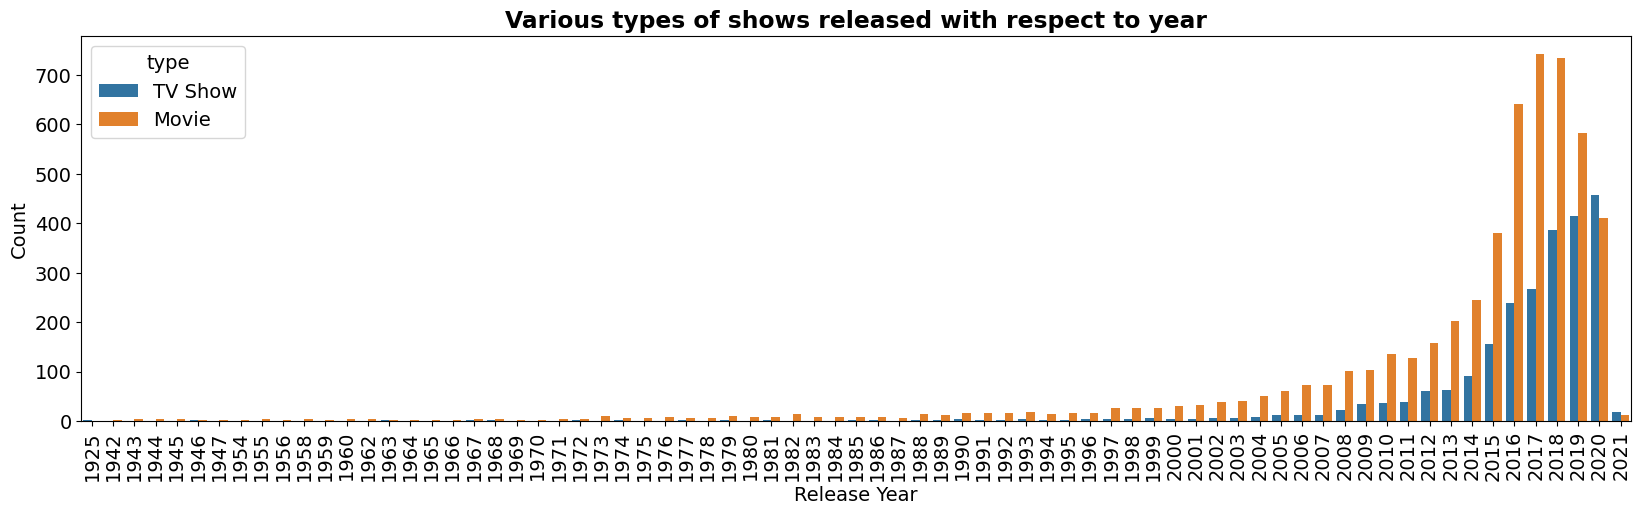

In [28]:
# Chart - 11 visualization code

sns.countplot(x='release_year',hue='type', data=df)

# setting chart title
plt.title('Various types of shows released with respect to year')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Count')

# display chart
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [29]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [30]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

Text(0.5, 52.7222222222222, 'Feature/Property')

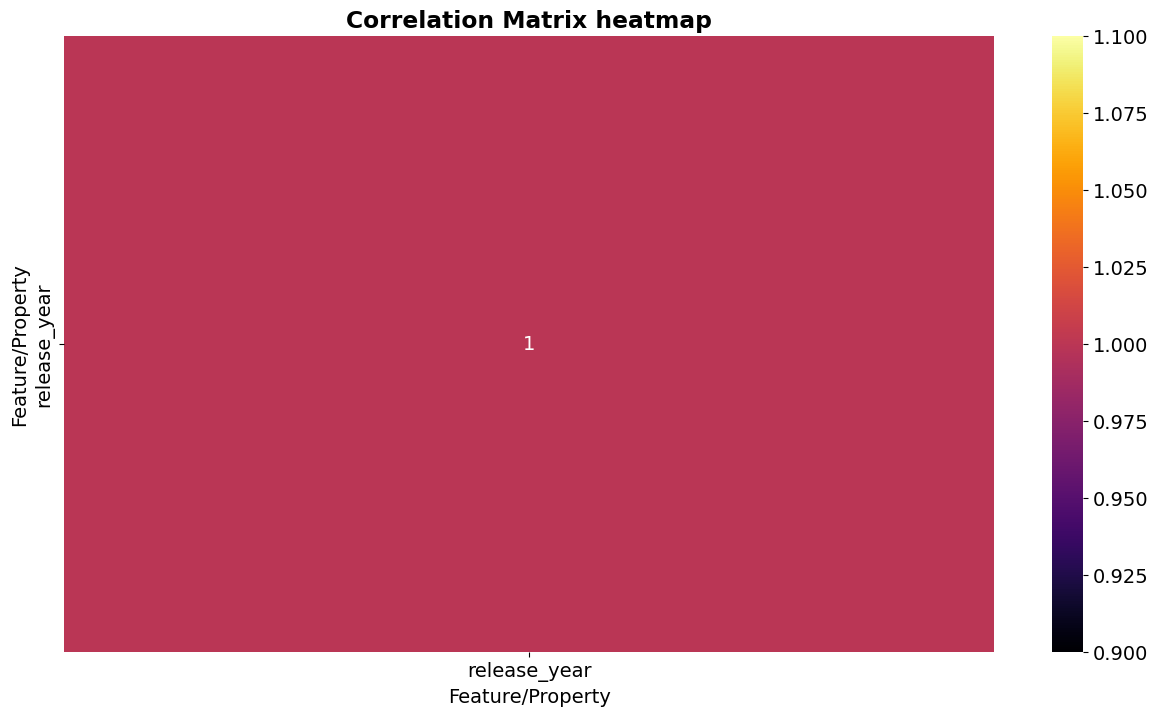

In [31]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick the specific chart?

The corelation chart shows the relation between the two specific feature

##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of int type, we are unable to visualize the Correlation Matrix heatmap

#### Chart - 15 - Pair Plot 

Text(0.5, 0, 'Feature/Property')

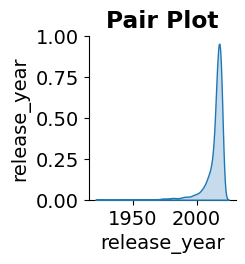

In [32]:
# Pair Plot visualization code

sns.pairplot(df, diag_kind="kde", kind = 'reg')


#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick the specific chart?

Pair plots are used to show relationship between various variables

Pair plots can also help us explore the distribution of variables in your dataset.

##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of int type, we are unable to visualize the pair plot

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



Netflix has the highest number of content in the United States, followed by India. India has the highest number of movies on Netflix
*   Null hypothesis H0: The average number of movies on Netflix in the United States is equal to the average number of movies on Netflix in India.

*   Alternate hypothesis Ha: The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.




#### 2. Perform an appropriate statistical test.

In [33]:

# Perform Statistical Test to obtain P-Value
# Filter by country
us_movie_df = movies_df[movies_df.country == 'United States']
india_movie_df = movies_df[movies_df.country == 'India']

# Perform t-test
t, p = ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Print the results
alpha = 0.05
if p < 0.05:
  print("We Reject null hypothesis.")
else:
  print("Fail to reject null hypothesis.")

We Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies available on Netflix in the United States and India, I conducted a two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movie data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 According to the countplot, it appears that Netflix adds the highest number of movies and TV shows during the period between October and January. This period seems to be the busiest time of year for Netflix in terms of adding new content to its platform.
 *   Null hypothesis H0: There is no significant difference in the number of movies and TV shows added by Netflix across different months.

*   Alternate hypothesis Ha: There is a significant difference in the number of movies and TV shows added by Netflix across different months.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

df["date_added"] = pd.to_datetime(df["date_added"])
df["month_added"] = df["date_added"].dt.month_name()
contingency_table = pd.crosstab(df["type"], df["month_added"])
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

chi2_statistic = round(chi2_statistic,2)
p_value = round(p_value,2)
# Print results
print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")


Chi-square statistic: 16.05
P-value: 0.14


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I performed a chi-square test for independence. The chi-square test is used to determine if there is a significant association between two categorical variables. In this case, I wanted to test if there was a significant association between the time of year and the number of new movies and TV shows added to Netflix. 

##### Why did you choose the specific statistical test?

I choose the chi-square test for independence as I was interested in testing for a potential association between two categorical variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The number of movies on Netflix is greater than the number of TV shows, with 5372 movies and 2398 TV shows currently available on the platform.
*   Null hypothesis H0:  The number of movies and TV shows on Netflix is not significantly different.

*   Alternate hypothesis Ha: The number of movies on Netflix is significantly greater than the number of TV shows.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

# Count the number of movies and TV shows
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']


print('Number of movies:', n_movies)
print('Number of TV shows:', n_tv_shows)


# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]
nobs = [len(df), len(df)]
print('after setting counts and sample sizes for the z-test:')
print('counts:', counts)
print('nobs:', nobs)

# Perform the z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('after performing the z-test assuming equal proportions:')
print('z-statistic:', z_stat)
print('p-value:', p_val)

Number of movies: 5372
Number of TV shows: 2398
after setting counts and sample sizes for the z-test:
counts: [5372, 2398]
nobs: [7770, 7770]
after performing the z-test assuming equal proportions:
z-statistic: 47.71395895355864
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

I used a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the two-sample z-test for proportions to compare the number of movies and TV shows on Netflix because the data consists of two categorical variables

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values
(Handled in data wrangling)

In [36]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have handled the missing values in data wrangling step

### 2. Handling Outliers
(most of the columns are categorical, no outliers observed)

In [37]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding
(no need as the data is categorical)

In [38]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [39]:
# Expand Contraction
# creating tags column using all text column which one is used for model building purpose.
df['tags'] = df['description']  + df['rating'] + df['country'] + df['listed_in'] + df['cast']

In [40]:
# cross checking our result for the function created
print(df['tags'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.TV-MABrazilInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


#### 2. Lower Casing

In [41]:
# Lower Casing
def to_lower(x):
  return x.lower()

df['tags'] = df['tags'].apply(to_lower)
# cross checking our result for the function created
print(df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.tv-mabrazilinternational tv shows, tv dramas, tv sci-fi & fantasyjoão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


#### 3. Removing Punctuations

In [42]:
# Remove Punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

df['tags'] = df['tags'].apply(remove_punctuation)
# cross checking our result for the function created
print(df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalortvmabrazilinternational tv shows tv dramas tv scifi  fantasyjoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 4. Removing URLs & Removing words and digits contain digits.

In [43]:
# Remove URLs & Remove words and digits contain digits
# our tags column doesnot have links so removing numbers
df['tags'] = df['tags'].str.replace(r'\w*\d\w*', '', regex=True)
# remove words and digits containing digits

# cross checking our result for the function created
print(df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalortvmabrazilinternational tv shows tv dramas tv scifi  fantasyjoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 5. Removing Stopwords & Removing White spaces

In [44]:
# Remove Stopwords
# since the language is english, we need to import english stop words
stop_words = stopwords.words('english')

def remove_stop_words(x):
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

  
# cross checking our result for the function created
print('before')
print(df['tags'][0])
# applying the created function
df['tags'] = df['tags'].apply(remove_stop_words)
# cross checking our result for the function created
print('after')
print(df['tags'][0])

before
in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalortvmabrazilinternational tv shows tv dramas tv scifi  fantasyjoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi
after
 future elite inhabit island paradise far crowded slums get one chance join saved squalortvmabrazilinternational tv shows tv dramas tv scifi fantasyjoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [45]:
# Remove White spaces
# remove white spaces in the 'tags'
df['tags'] = df['tags'].str.strip()
# cross checking our result for the function created

print(df['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalortvmabrazilinternational tv shows tv dramas tv scifi fantasyjoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 6. Rephrase Text
not required

In [46]:
# # Rephrase Text
# # not performing rephrasing of text
# # rephrasing can be achived by the following code

# def rephrase_tags(x):
#     return x.replace('interesting', 'fascinating')
# df['tags'] = df['tags'].apply(rephrase_tags)


#### 7. Tokenization
not required

In [47]:
# Tokenization
# Not required in our case

#### 8. Text Normalization

In [48]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# # initialize CountVectorizer
# vectorizer = CountVectorizer()

# # fit and transform the 'tags' column
# tags_vectorized = vectorizer.fit_transform(df['tags'])

# # create a dataframe with the vectorized tags
# tags_df = pd.DataFrame(tags_vectorized.toarray(), columns=vectorizer.get_feature_names())

# # concatenate the new dataframe with the original one
# df = pd.concat([df, tags_df], axis=1)

# # drop the 'tags' column
# df.drop('tags', axis=1, inplace=True)
# Vectorizing Text
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)   
# setting max features = 9000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['tags'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()


In [49]:
# convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of vector : (7770, 9000)
datatype : <class 'numpy.ndarray'>


##### Which text normalization technique have you used and why?

Word/Text vectorization is useful because most machine learning algorithms cannot work with raw text data directly. Instead, they require numerical inputs that can be processed mathematically. Word/Text vectorization solves this problem by transforming the text data into numerical vectors that can be understood by machine learning algorithms.

#### 9. Part of speech tagging

In [50]:
# POS Taging

#### 10. Text Vectorization

In [51]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [52]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [53]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [54]:
# Transform Your data

### 6. Data Scaling

In [55]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [56]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)

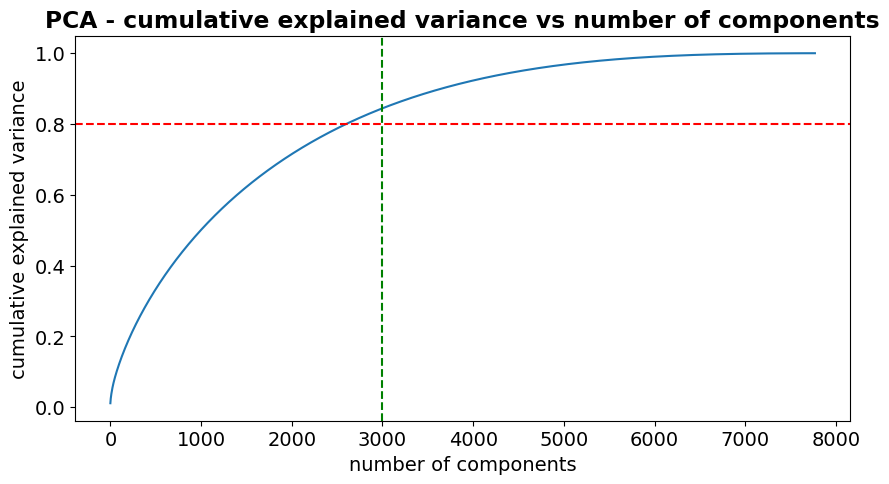

In [57]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

In [58]:
# reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

In [59]:
# transformed features
X = pca.transform(vector)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA to reduce the dimensionality of data.

### 8. Data Splitting

In [124]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [125]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

For n_clusters = 2, silhouette score is 0.008614985988942385
For n_clusters = 3, silhouette score is 0.009843091029903595
For n_clusters = 4, silhouette score is 0.010244646096276188
For n_clusters = 5, silhouette score is 0.009740072983246377
For n_clusters = 6, silhouette score is 0.011178977765897179
For n_clusters = 7, silhouette score is 0.004671686409531062
For n_clusters = 8, silhouette score is 0.0047585493609598045
For n_clusters = 9, silhouette score is 0.005968782086543158
For n_clusters = 10, silhouette score is 0.005031936844260079
For n_clusters = 11, silhouette score is 0.005417108377220922


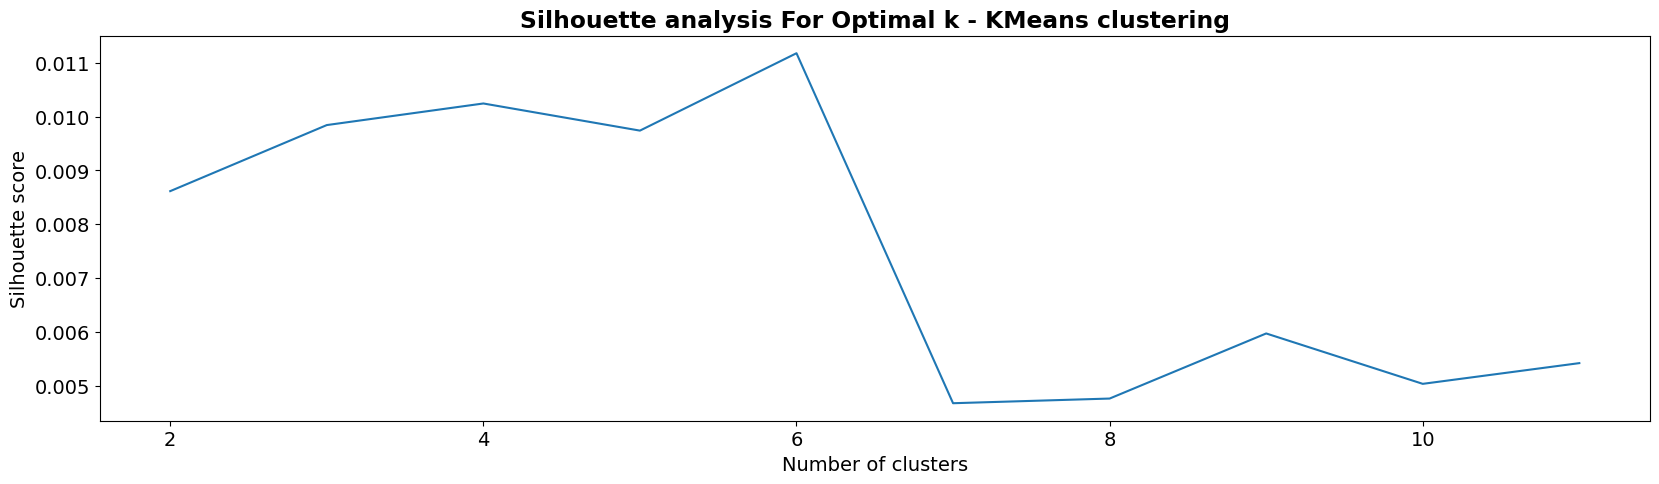

In [62]:
silhouette_avg = []
# range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
for n_clusters in range(2, 12):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_avg.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(range(2,12), silhouette_avg)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [63]:
# Clustering the data into 5 clusters as silhouette score is 0.004671686409531062
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=32)
kmeans.fit(X)

KMeans(n_clusters=7, random_state=32)

In [65]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)
print(f'Kmeans distortion = {kmeans_distortion}')
print(f'Silhouette Score = {kmeans_silhouette_score}')
# print((kmeans_distortion, kmeans_silhouette_score))

Kmeans distortion = 5860.566200224637
Silhouette Score = 0.005647167326517315


In [66]:
# updating kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [67]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,tags,kmeans_cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,future elite inhabit island paradise far crowd...,2
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,devastating earthquake hits mexico city trappe...,3
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,army recruit found dead fellow soldiers forced...,3
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,postapocalyptic world ragdoll robots hide fear...,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,brilliant group students become cardcounting e...,1


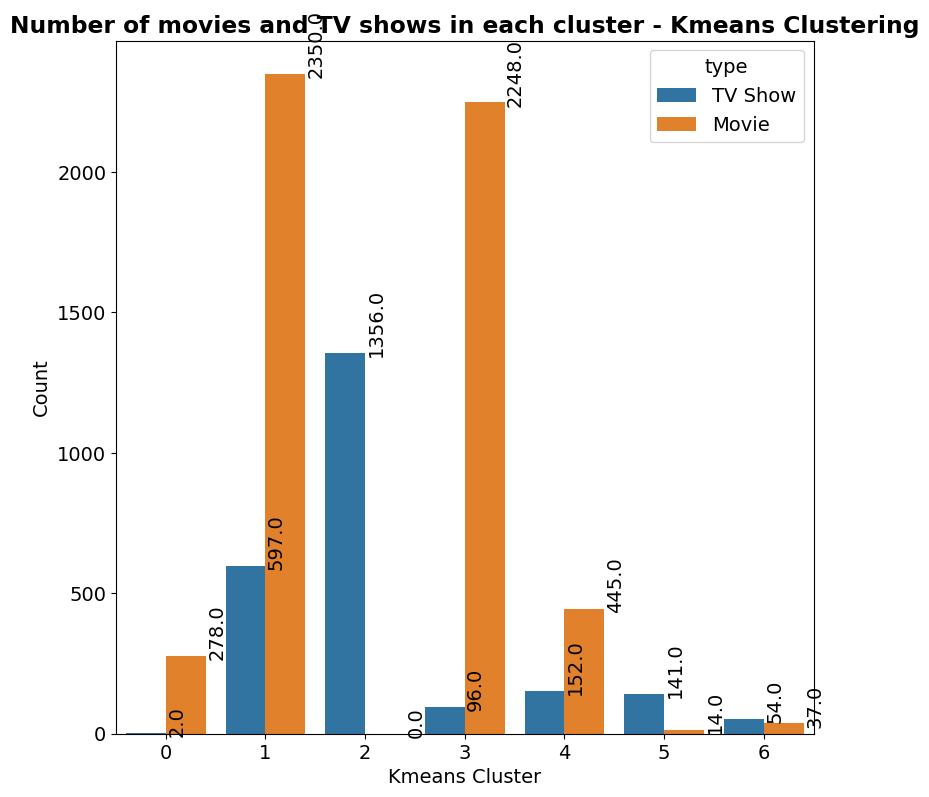

In [81]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(9,9))
sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
plt.xlabel('Kmeans Cluster')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', rotation=90)
plt.show()

In [126]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [127]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [128]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

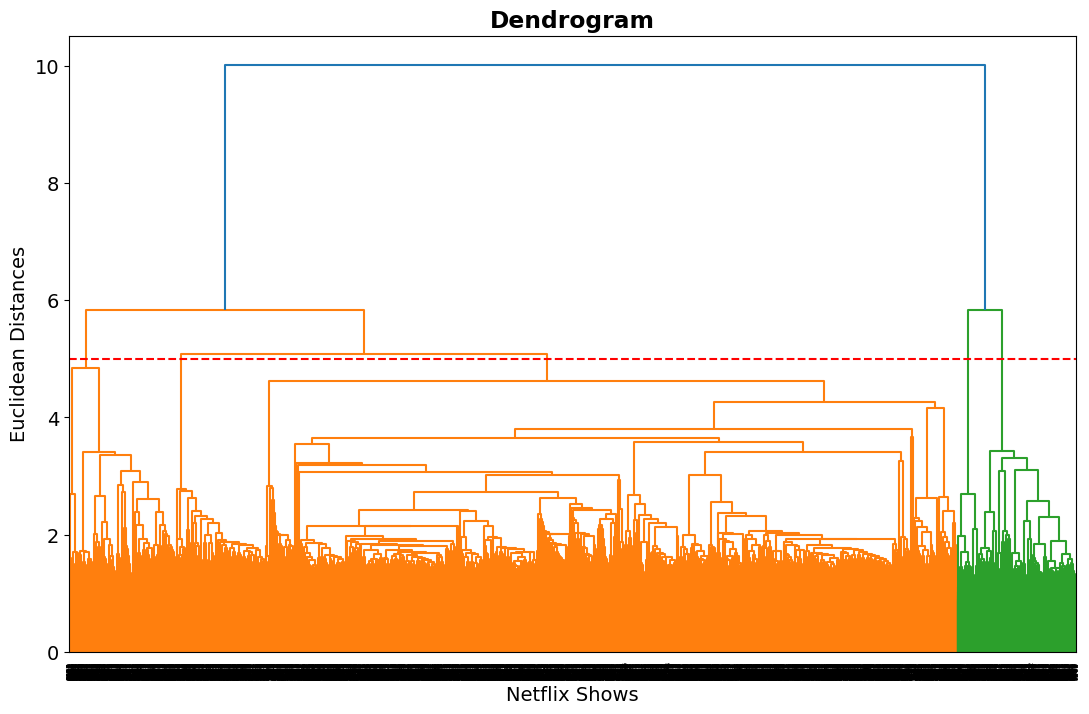

In [88]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Euclidean Distances')
plt.axhline(y= 5, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.show() 

With threshold 5 we can make 5 clusters

In [89]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

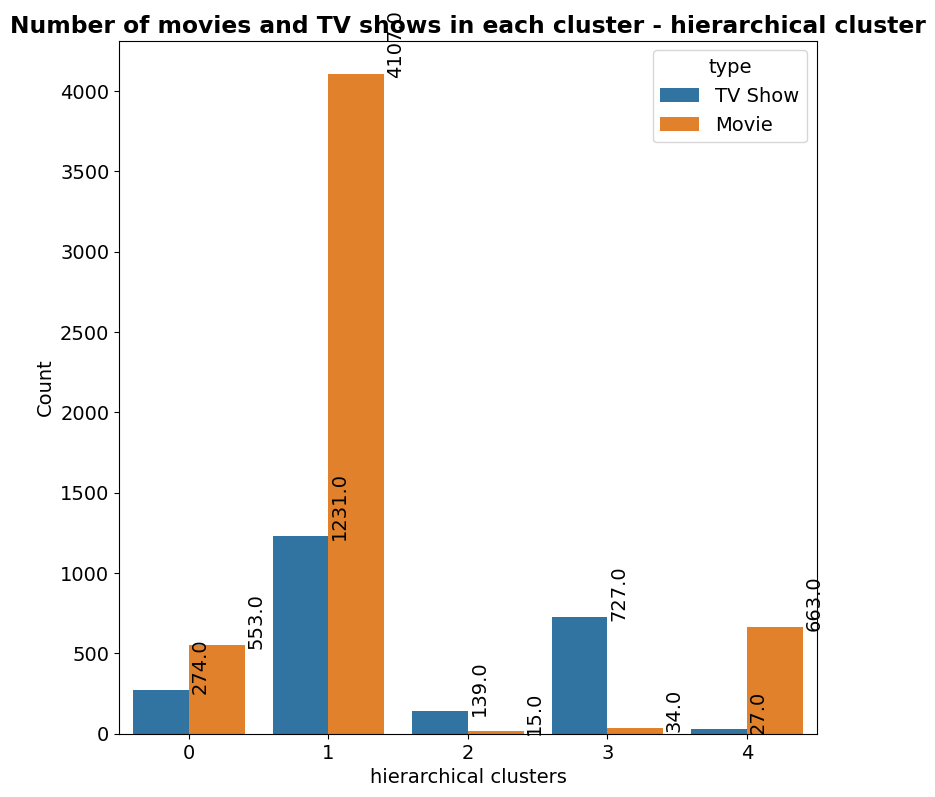

In [90]:
plt.figure(figsize=(9,9))
sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - hierarchical cluster')
plt.xlabel('hierarchical clusters')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', rotation=90)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [129]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [130]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In [91]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# dropping show-id and index column
recommender_df = recommender_df.drop(columns=['index', 'show_id'])

In [92]:
recommender_df.head()

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,tags,kmeans_cluster,hierarchical_cluster
0,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,future elite inhabit island paradise far crowd...,2,3
1,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,devastating earthquake hits mexico city trappe...,3,1
2,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,army recruit found dead fellow soldiers forced...,3,3
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,postapocalyptic world ragdoll robots hide fear...,1,1
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,brilliant group students become cardcounting e...,1,1


### ML Model - 3

In [131]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [132]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [133]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [134]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [135]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***